In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import tqdm
from sklearn.covariance import EllipticEnvelope
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, make_scorer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
TDCAG = pd.read_csv('./TaxiDatasetAgg.csv')

In [3]:
TDCAG.head(10)

,booking_id,accuracy_mean,accuracy_max,accuracy_min,accuracy_std,accuracy_25%,accuracy_75%,bearing_mean,bearing_max,bearing_min,...,turning_force_std,turning_force_25%,turning_force_75%,acceleration_mean,acceleration_max,acceleration_min,acceleration_std,acceleration_25%,acceleration_75%,label
0,0,9.855411,48.000,4.000,3.961431,8.0000,12.00000,176.745606,359.97977,0.037464,...,425243.970106,-545810.0650,-22569.36225,0.012712,0.137985,0.0,0.021438,0.004115,0.012772,0
1,1,3.922742,84.450,3.000,4.104310,3.0000,4.00000,127.311267,337.00000,0.000000,...,344555.457697,129148.6675,486373.53500,0.032536,1.839744,0.0,0.138877,0.000000,0.022038,1
2,2,3.818223,8.000,3.000,1.089036,3.0000,3.95000,183.765060,330.00000,11.000000,...,348493.922292,-103351.1050,335794.77000,0.056233,0.514143,0.0,0.092621,0.000000,0.093323,1
3,4,9.953348,11.000,4.069,0.481017,10.0000,10.00000,149.783870,351.40985,2.271227,...,303380.890713,-334010.3050,-63452.88125,0.036966,5.170000,0.0,0.258846,0.005585,0.020596,1
4,6,4.623058,12.000,3.000,1.365257,3.9000,4.94575,194.469008,346.00000,0.000000,...,359611.049924,83473.2410,454093.61000,0.064067,9.454126,0.0,0.521633,0.000000,0.015677,0
5,7,3.767634,17.000,3.000,0.772210,3.9000,3.90000,99.333887,359.00000,0.000000,...,449121.457831,405633.0500,835719.50000,0.099428,2.086684,0.0,0.216677,0.011824,0.108882,0
6,8,7.097653,18.204,3.129,3.291998,4.5510,9.10200,159.761123,348.00000,0.000000,...,282415.338571,-686356.0000,-456913.34000,0.064845,3.580000,0.0,0.314996,0.000000,0.033724,0
7,10,3.806856,9.000,3.000,0.842113,3.0085,3.90000,119.101241,341.00000,0.000000,...,468557.797211,-662543.9525,-201785.81750,0.052777,0.230704,0.0,0.058651,0.000885,0.063175,0
8,11,4.285775,6.000,3.000,1.025281,3.6810,5.01775,134.191473,342.00000,6.000000,...,409367.593346,-227867.0250,311076.54000,0.130630,0.650072,0.0,0.171045,0.004256,0.227913,0
9,13,10.709398,1065.085,3.000,61.649425,3.9000,8.00000,213.743659,357.00000,0.000000,...,361022.335164,267678.1325,697722.26750,0.043104,3.186484,0.0,0.157317,0.017380,0.036234,0


In [4]:
TDCAG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19990 entries, 0 to 19989
Data columns (total 92 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   booking_id           19990 non-null  int64  
 1   accuracy_mean        19990 non-null  float64
 2   accuracy_max         19990 non-null  float64
 3   accuracy_min         19990 non-null  float64
 4   accuracy_std         19990 non-null  float64
 5   accuracy_25%         19990 non-null  float64
 6   accuracy_75%         19990 non-null  float64
 7   bearing_mean         19990 non-null  float64
 8   bearing_max          19990 non-null  float64
 9   bearing_min          19990 non-null  float64
 10  bearing_std          19990 non-null  float64
 11  bearing_25%          19990 non-null  float64
 12  bearing_75%          19990 non-null  float64
 13  acceleration_x_mean  19990 non-null  float64
 14  acceleration_x_max   19990 non-null  float64
 15  acceleration_x_min   19990 non-null 

### EDA on Label Distribution

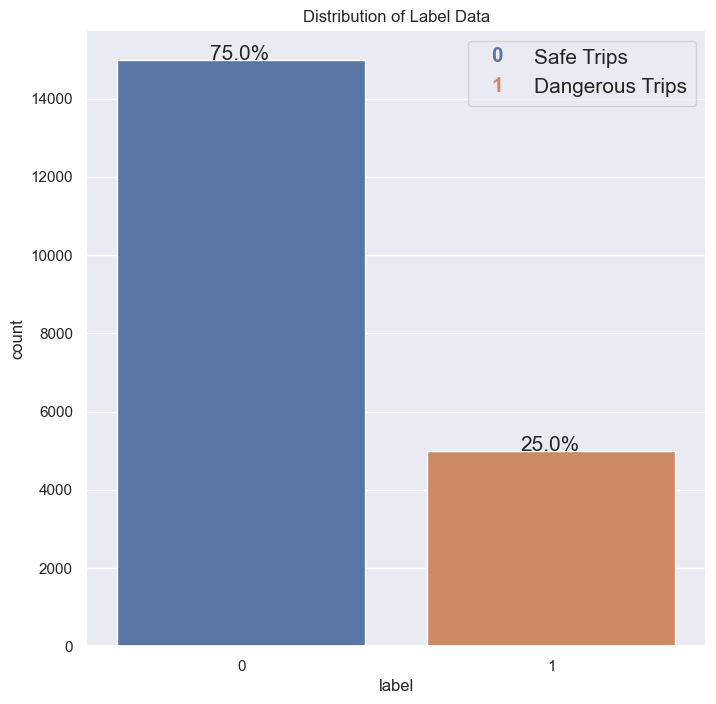

In [5]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

def percentage(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = f'{(100 * p.get_height()/total):.1f}%'
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height() 
        ax.annotate(percentage, (x, y), size = 15)
        
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='label', data=TDCAG)
plt.title('Distribution of Label Data')

handltext = ['0', '1']
labels = ['Safe Trips', 'Dangerous Trips']
t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]
percentage(ax, TDCAG.label)
ax.legend(handles, labels, handler_map={tuple : TextHandler()}, prop={'size': 15})

### Safe Trips - 75%
### Dangerous Trips - 25%
### Safe Trip has 3x larger data than Dangerous Trips 
### Since there is a big difference between the amount of safe to dangerous trips we need to balance the dataset to an even 50 50 so that the machine learning algorithm will not predict one label better than another thus we will need to handle the imbalanced classes

## Model Performance Before Handling Imbalanced Classes

In [6]:
X = TDCAG.drop(['label','booking_id'], axis=1)
y = TDCAG.label

In [7]:
import dask
import dask.dataframe as dd
from sklearn.utils import parallel_backend
from dask.distributed import Client


client = Client()

scoring = {
    'precision': 'precision',
    'roc_auc': 'roc_auc',
    'F1': 'f1'
}

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

lr_model = LogisticRegression(max_iter=50000)
with parallel_backend('dask'):
    lr_model.fit(X_train,y_train)
    y_pred_lr = lr_model.predict(X_test)

gbc_model = GradientBoostingClassifier(n_estimators = 50)
with parallel_backend('dask'):
    gbc_model.fit(X_train, y_train)
    y_pred_gbc = gbc_model.predict(X_test)

cv_results_lr = cross_validate(lr_model, X_train, y_train, cv=5, scoring=scoring)
cv_results_gbc = cross_validate(gbc_model, X_train, y_train, cv=5, scoring=scoring)

summary = pd.DataFrame([[cv_results_lr['fit_time'].mean(), cv_results_lr['test_F1'].mean(), cv_results_lr['test_precision'].mean(), cv_results_lr['test_roc_auc'].mean()],
                        [cv_results_gbc['fit_time'].mean(), cv_results_gbc['test_F1'].mean(), cv_results_gbc['test_precision'].mean(), cv_results_gbc['test_roc_auc'].mean()]],
                        columns=['Mean Fit Time', 'Mean F1 Score', 'Mean Precision', 'Mean ROC AUC'], index=['Logistic Regression', 'Gradient Boosting Classifier'])
display(summary.round(2))

,Mean Fit Time,Mean F1 Score,Mean Precision,Mean ROC AUC
Logistic Regression,2.55,0.27,0.64,0.69
Gradient Boosting Classifier,23.12,0.31,0.71,0.73


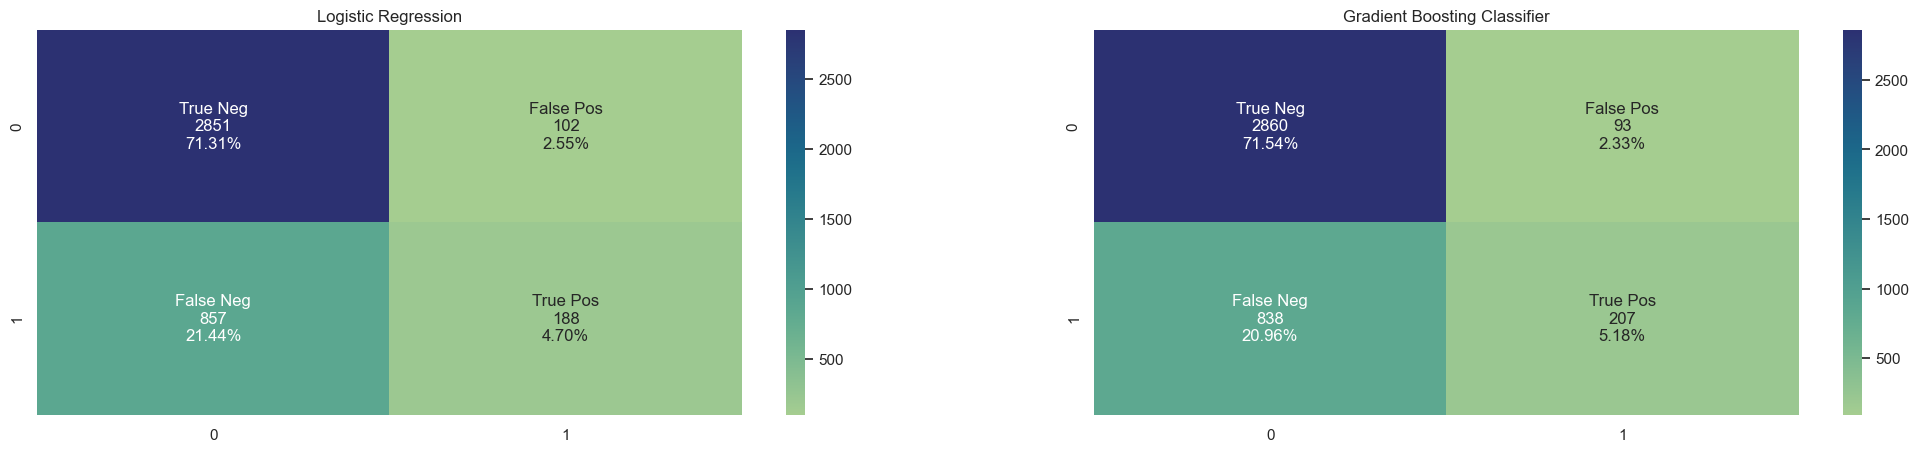

In [8]:
y_pred = []
y_pred.append(y_pred_lr)
y_pred.append(y_pred_gbc)

model_name = ['Logistic Regression', 'Gradient Boosting Classifier']

plt.figure(figsize=(25,5))
for i in range(len(y_pred)):
  plt.subplot(1, 2, i+1)
  cf_matrix = confusion_matrix(y_test, y_pred[i])
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='crest')
  plt.title(model_name[i])
plt.show()

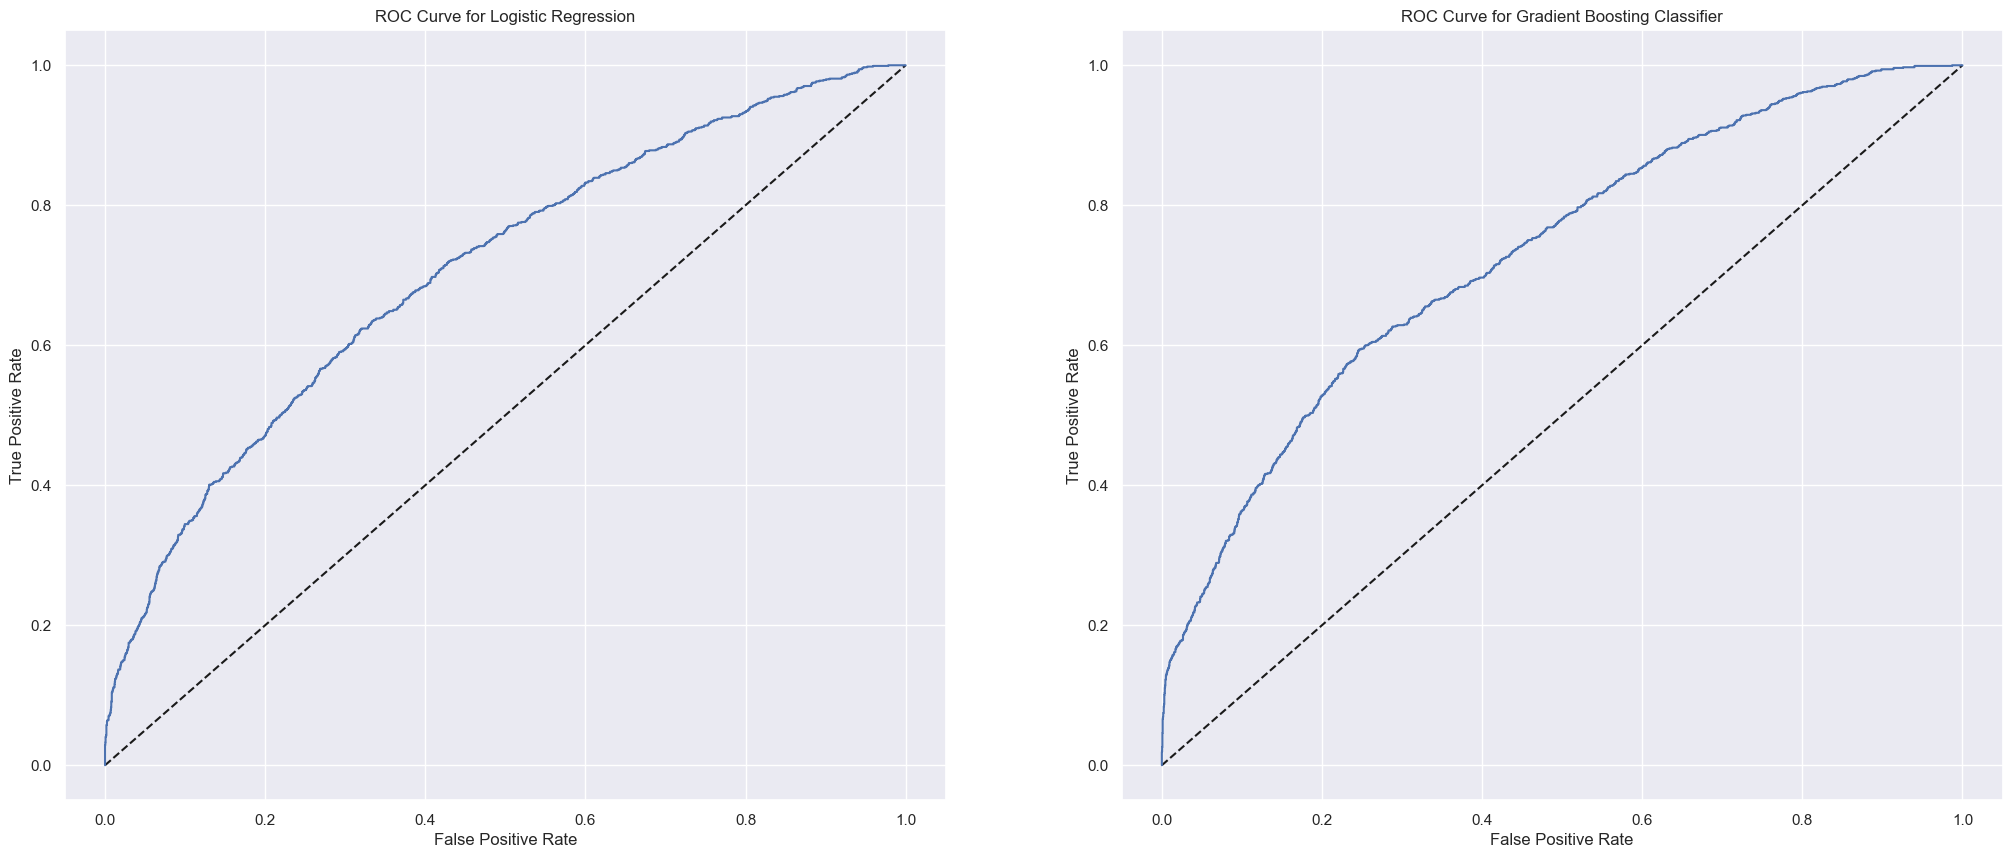

In [9]:
y_pred_prob_lr =lr_model.predict_proba(X_test)[:,1]
y_pred_prob_gbc =gbc_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ =roc_curve(y_test, y_pred_prob_lr)
fpr_gbc, tpr_gbc, _ =roc_curve(y_test, y_pred_prob_gbc)
fpr = []
fpr.append(fpr_lr)
fpr.append(fpr_gbc)
tpr = []
tpr.append(tpr_lr)
tpr.append(tpr_gbc)
plt.figure(figsize=(25,10))
for i in range(len(fpr)):
  plt.subplot(1, 2, i+1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr[i], tpr[i])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {model_name[i]}')
plt.show()

## Model Performance After Handling Imbalanced Classes (Random Under Sampling)

Text(0.5, 1.0, 'Distribution of Label')

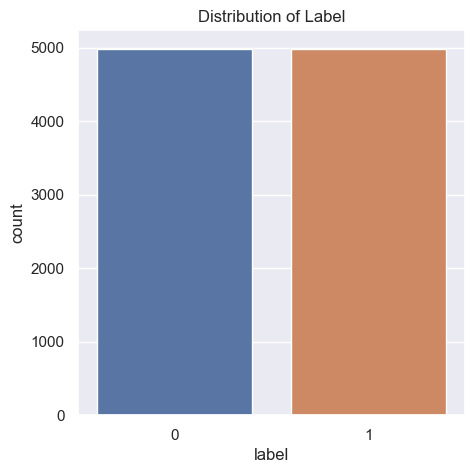

In [10]:
X = TDCAG.drop(['label','booking_id'], axis=1)
y = TDCAG.label

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

df = X_rus
df['label'] = y_rus

plt.figure(figsize=(5,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='label', data=df)
plt.title('Distribution of Label')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

lr_model = Pipeline(steps=[("Sampling Strategy", RandomUnderSampler(random_state=42)),("Logistic Regression", LogisticRegression(max_iter=50000))])
with parallel_backend('dask'):
    lr_model.fit(X_train,y_train)
    y_pred_lr = lr_model.predict(X_test)

gbc_model = Pipeline(steps=[("Sampling Strategy", RandomUnderSampler(random_state=42)),("Gradient Boosting Classifier", GradientBoostingClassifier(n_estimators = 50))])
with parallel_backend('dask'):
    gbc_model.fit(X_train, y_train)
    y_pred_gbc = gbc_model.predict(X_test)
    

cv_results_lr = cross_validate(lr_model, X_train, y_train, cv=5, scoring=scoring)
cv_results_gbc = cross_validate(gbc_model, X_train, y_train, cv=5, scoring=scoring)

summary = pd.DataFrame([[cv_results_lr['fit_time'].mean(), cv_results_lr['test_F1'].mean(), cv_results_lr['test_precision'].mean(), cv_results_lr['test_roc_auc'].mean()],
                        [cv_results_gbc['fit_time'].mean(), cv_results_gbc['test_F1'].mean(), cv_results_gbc['test_precision'].mean(), cv_results_gbc['test_roc_auc'].mean()]],
                        columns=['Mean Fit Time', 'Mean F1 Score', 'Mean Precision', 'Mean ROC AUC'], index=['Logistic Regression', 'Gradient Boosting Classifier'])
display(summary.round(2))

,Mean Fit Time,Mean F1 Score,Mean Precision,Mean ROC AUC
Logistic Regression,2.55,0.46,0.37,0.69
Gradient Boosting Classifier,13.53,0.48,0.39,0.73


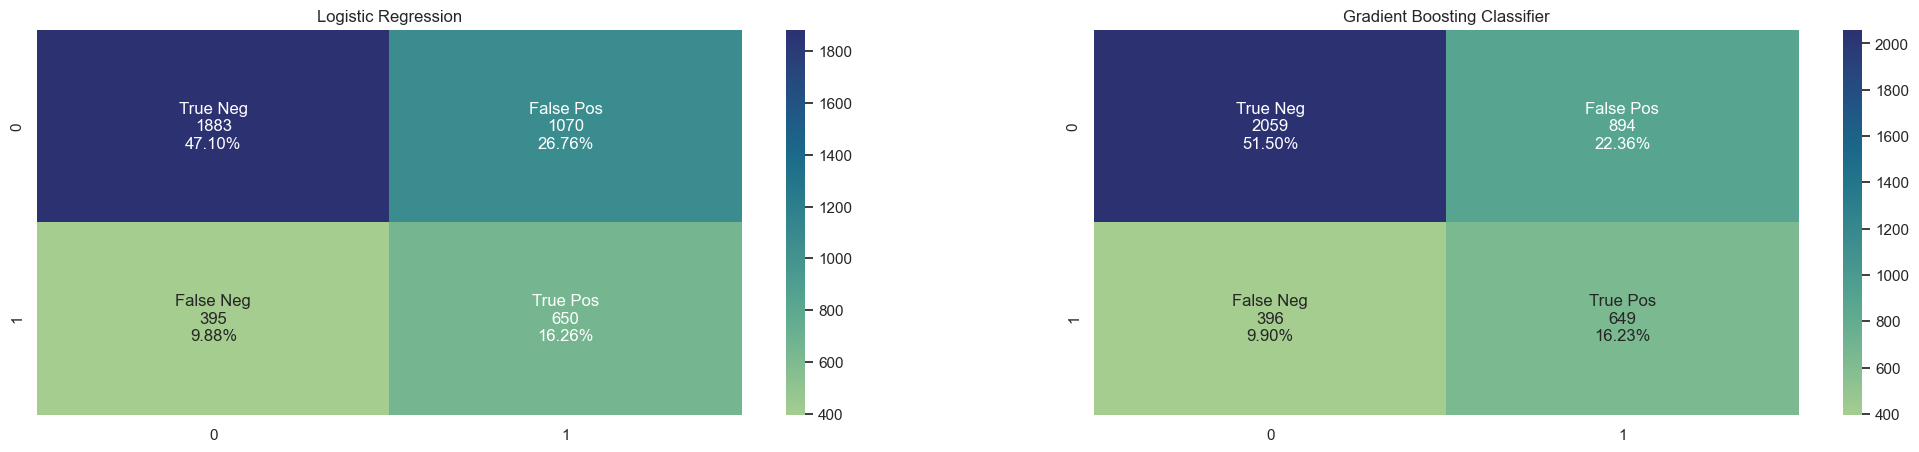

In [12]:
y_pred = []
y_pred.append(y_pred_lr)
y_pred.append(y_pred_gbc)

model_name = ['Logistic Regression', 'Gradient Boosting Classifier']

plt.figure(figsize=(25,5))
for i in range(len(y_pred)):
  plt.subplot(1, 2, i+1)
  cf_matrix = confusion_matrix(y_test, y_pred[i])
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='crest')
  plt.title(model_name[i])
plt.show()

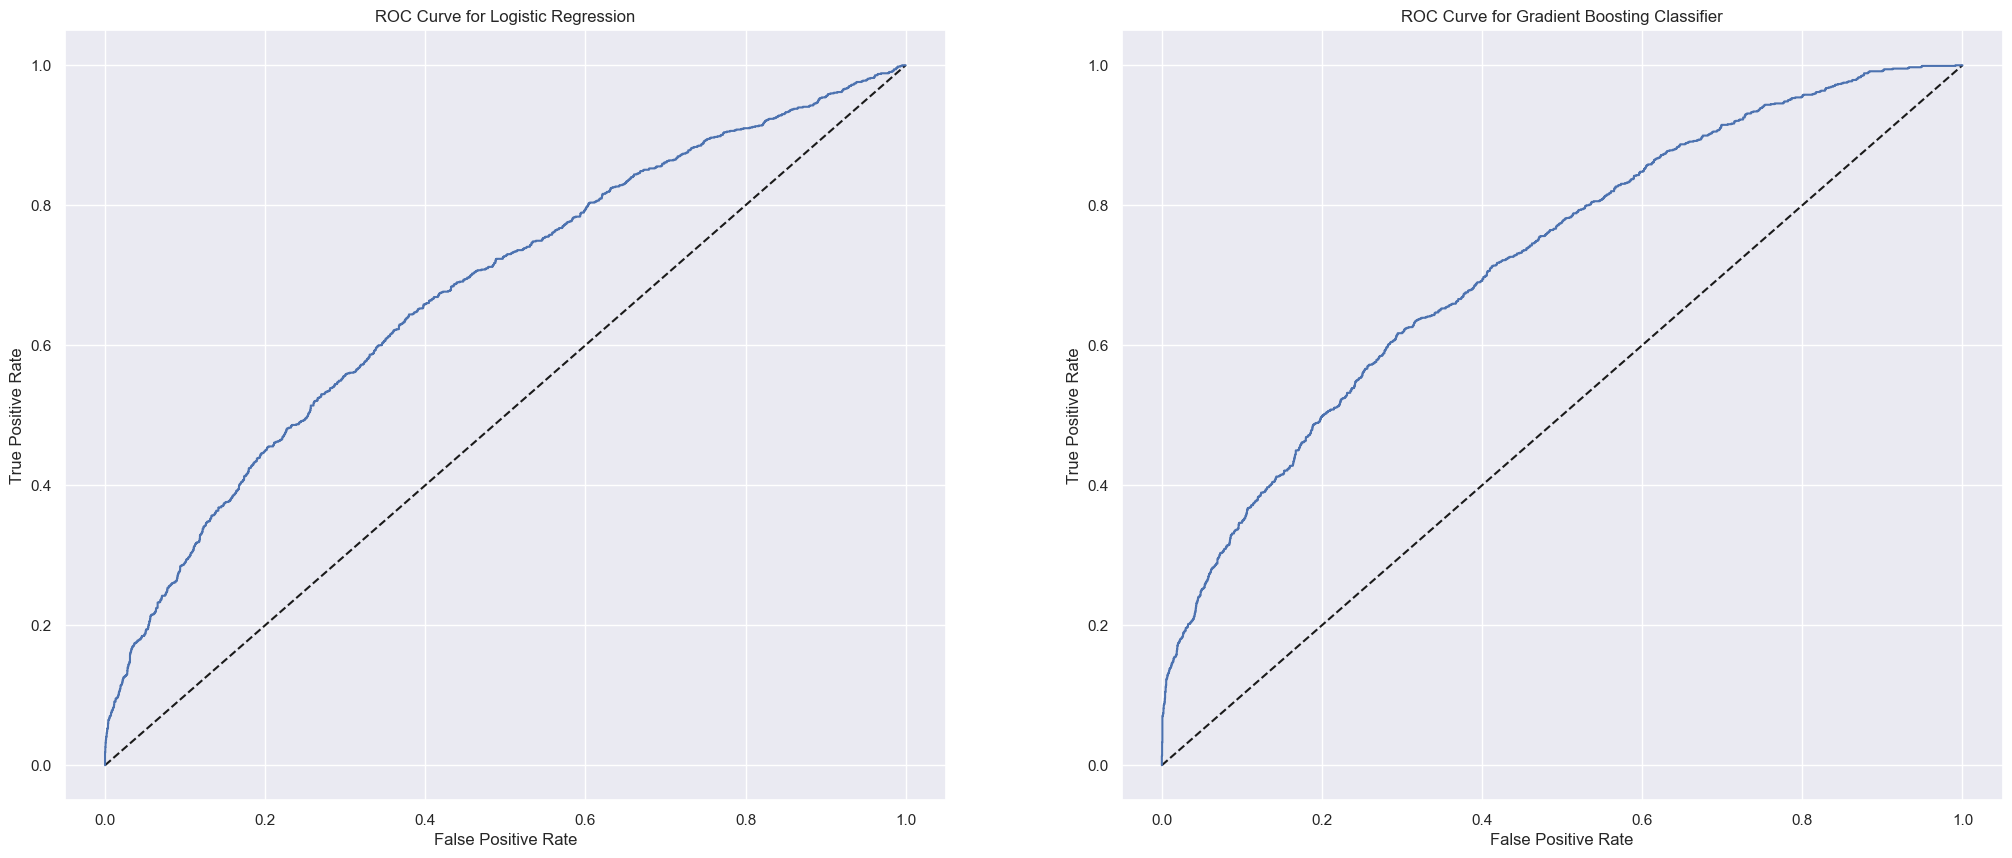

In [13]:
y_pred_prob_lr =lr_model.predict_proba(X_test)[:,1]
y_pred_prob_gbc =gbc_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ =roc_curve(y_test, y_pred_prob_lr)
fpr_gbc, tpr_gbc, _ =roc_curve(y_test, y_pred_prob_gbc)
fpr = []
fpr.append(fpr_lr)
fpr.append(fpr_gbc)
tpr = []
tpr.append(tpr_lr)
tpr.append(tpr_gbc)
plt.figure(figsize=(25,10))
for i in range(len(fpr)):
  plt.subplot(1, 2, i+1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr[i], tpr[i])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {model_name[i]}')
plt.show()

## Model Performance After Handling Imbalanced Classes (Random Over Sampling)

Text(0.5, 1.0, 'Distribution of Label')

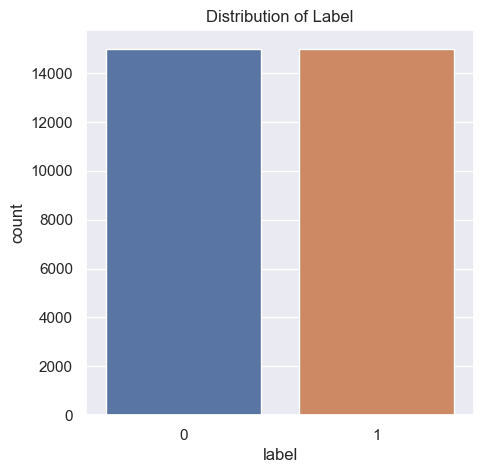

In [14]:
X = TDCAG.drop(['label','booking_id'], axis=1)
y = TDCAG.label

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

df = X_ros
df['label'] = y_ros

plt.figure(figsize=(5,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='label', data=df)
plt.title('Distribution of Label')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

lr_model = Pipeline(steps=[("Sampling Strategy",  RandomOverSampler(random_state=42)),("Logistic Regression", LogisticRegression(max_iter=50000))])
with parallel_backend('dask'):
    lr_model.fit(X_train,y_train)
    y_pred_lr = lr_model.predict(X_test)

gbc_model = Pipeline(steps=[("Sampling Strategy",  RandomOverSampler(random_state=42)),("Gradient Boosting Classifier", GradientBoostingClassifier(n_estimators = 50))])
with parallel_backend('dask'):
    gbc_model.fit(X_train, y_train)
    y_pred_gbc = gbc_model.predict(X_test)
    

cv_results_lr = cross_validate(lr_model, X_train, y_train, cv=5, scoring=scoring)
cv_results_gbc = cross_validate(gbc_model, X_train, y_train, cv=5, scoring=scoring)

summary = pd.DataFrame([[cv_results_lr['fit_time'].mean(), cv_results_lr['test_F1'].mean(), cv_results_lr['test_precision'].mean(), cv_results_lr['test_roc_auc'].mean()],
                        [cv_results_gbc['fit_time'].mean(), cv_results_gbc['test_F1'].mean(), cv_results_gbc['test_precision'].mean(), cv_results_gbc['test_roc_auc'].mean()]],
                        columns=['Mean Fit Time', 'Mean F1 Score', 'Mean Precision', 'Mean ROC AUC'], index=['Logistic Regression', 'Gradient Boosting Classifier'])
display(summary.round(2))

,Mean Fit Time,Mean F1 Score,Mean Precision,Mean ROC AUC
Logistic Regression,11.23,0.46,0.37,0.69
Gradient Boosting Classifier,42.14,0.48,0.40,0.73


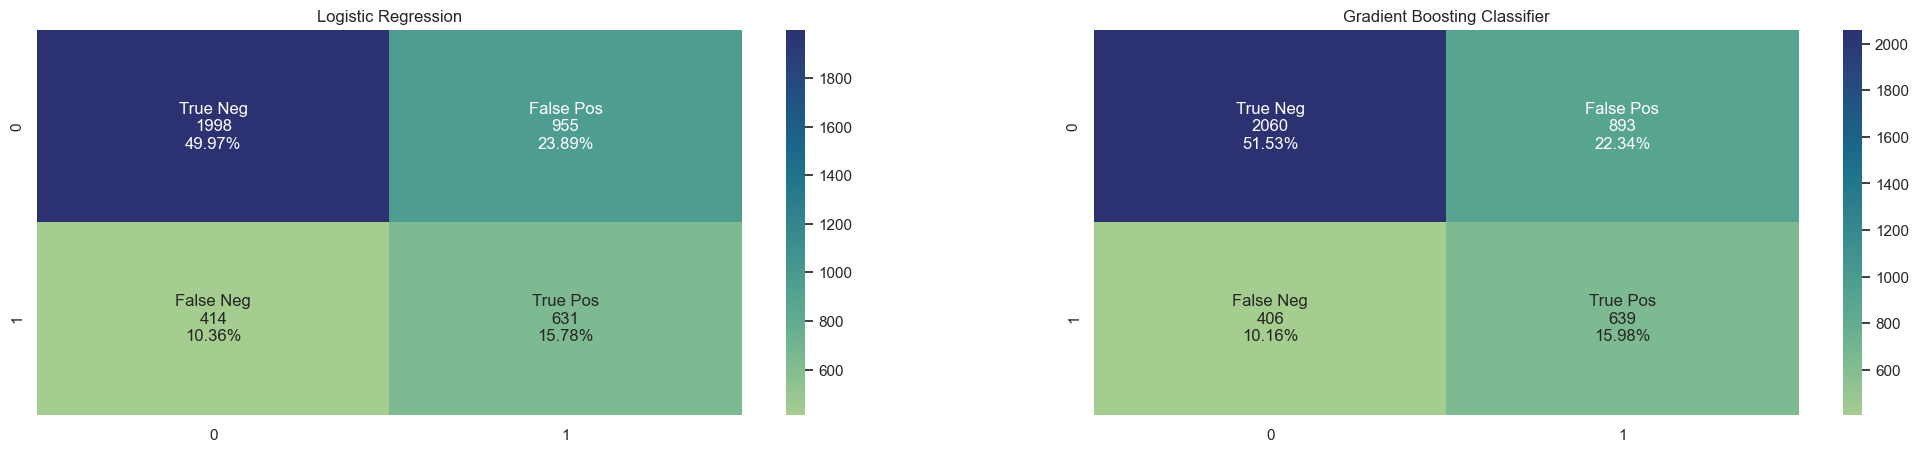

In [16]:
y_pred = []
y_pred.append(y_pred_lr)
y_pred.append(y_pred_gbc)

model_name = ['Logistic Regression', 'Gradient Boosting Classifier']

plt.figure(figsize=(25,5))
for i in range(len(y_pred)):
  plt.subplot(1, 2, i+1)
  cf_matrix = confusion_matrix(y_test, y_pred[i])
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='crest')
  plt.title(model_name[i])
plt.show()

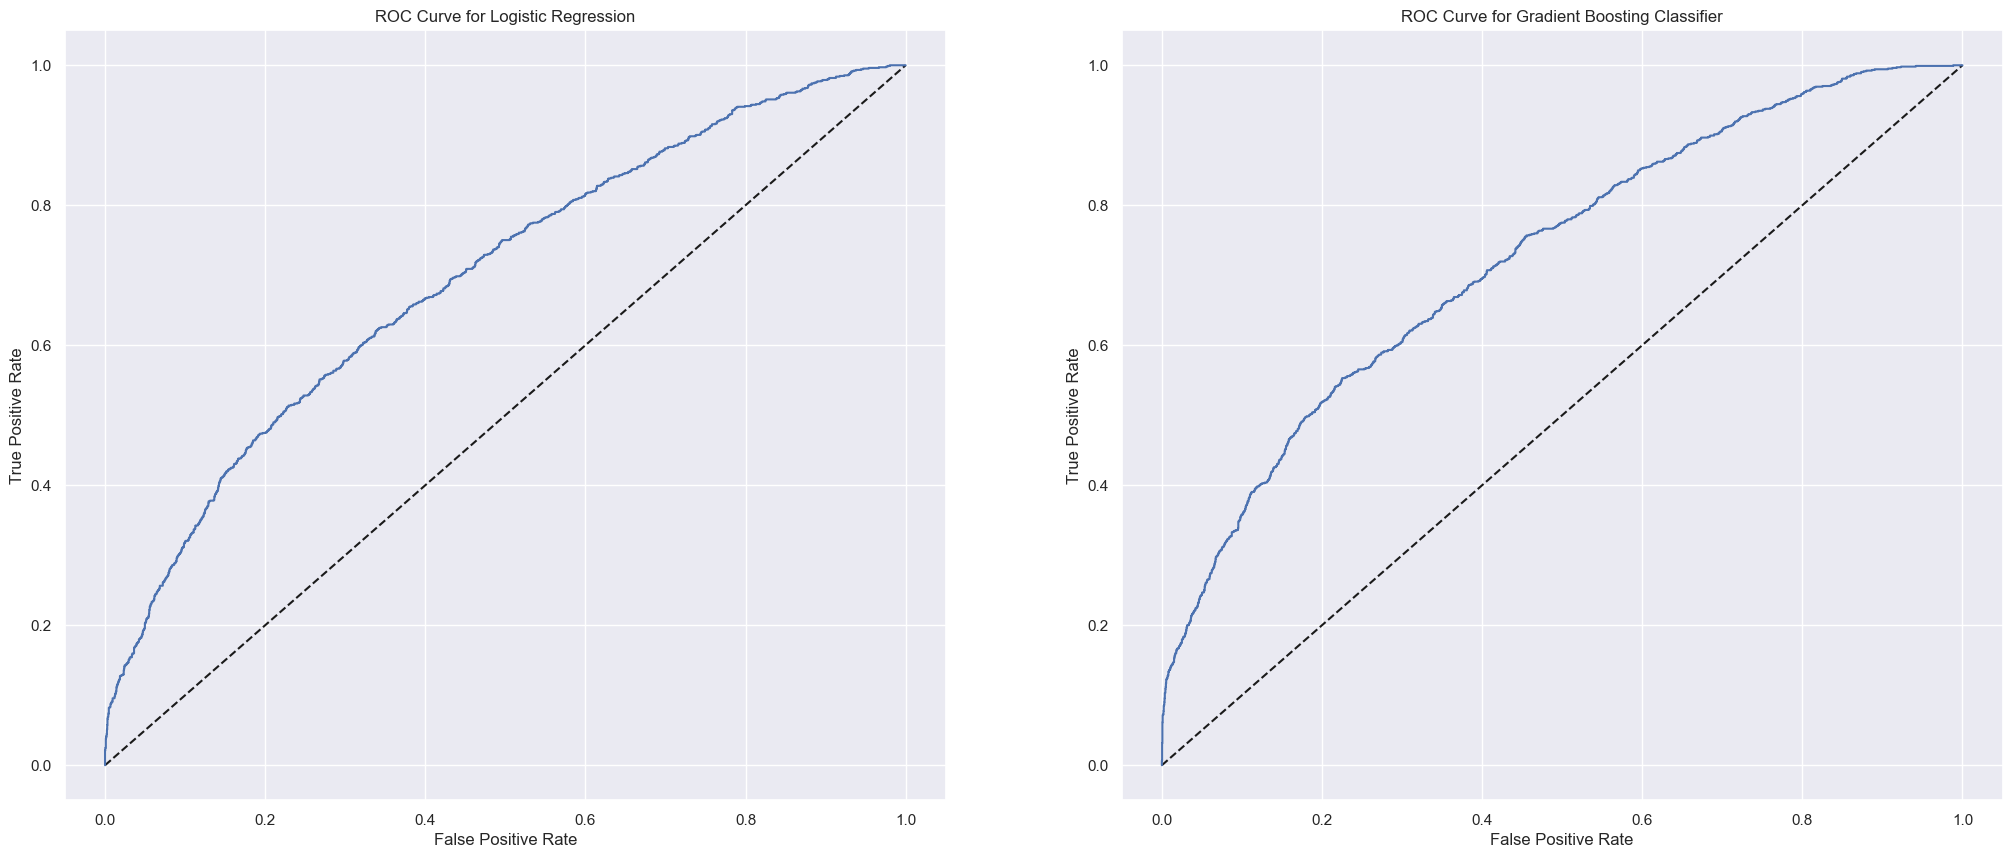

In [17]:
y_pred_prob_lr =lr_model.predict_proba(X_test)[:,1]
y_pred_prob_gbc =gbc_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ =roc_curve(y_test, y_pred_prob_lr)
fpr_gbc, tpr_gbc, _ =roc_curve(y_test, y_pred_prob_gbc)
fpr = []
fpr.append(fpr_lr)
fpr.append(fpr_gbc)
tpr = []
tpr.append(tpr_lr)
tpr.append(tpr_gbc)
plt.figure(figsize=(25,10))
for i in range(len(fpr)):
  plt.subplot(1, 2, i+1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr[i], tpr[i])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {model_name[i]}')
plt.show()

## Model Performance After Handling Imbalanced Classes (Synthetic Minority Oversampling Technique)

Text(0.5, 1.0, 'Distribution of Label')

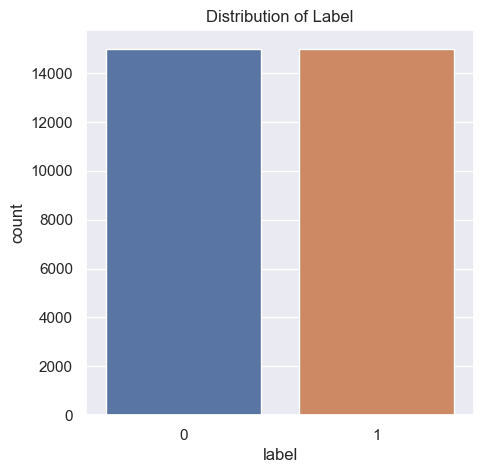

In [18]:
X = TDCAG.drop(['label','booking_id'], axis=1)
y = TDCAG.label

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

df = X_smote
df['label'] = y_smote

plt.figure(figsize=(5,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='label', data=df)
plt.title('Distribution of Label')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

lr_model = Pipeline(steps=[("Sampling Strategy",  SMOTE()),("Logistic Regression", LogisticRegression(max_iter=50000))])
with parallel_backend('dask'):
    lr_model.fit(X_train,y_train)
    y_pred_lr = lr_model.predict(X_test)

gbc_model = Pipeline(steps=[("Sampling Strategy",  SMOTE()),("Gradient Boosting Classifier", GradientBoostingClassifier(n_estimators = 50))])
with parallel_backend('dask'):
    gbc_model.fit(X_train, y_train)
    y_pred_gbc = gbc_model.predict(X_test)
    

cv_results_lr = cross_validate(lr_model, X_train, y_train, cv=5, scoring=scoring)
cv_results_gbc = cross_validate(gbc_model, X_train, y_train, cv=5, scoring=scoring)

summary = pd.DataFrame([[cv_results_lr['fit_time'].mean(), cv_results_lr['test_F1'].mean(), cv_results_lr['test_precision'].mean(), cv_results_lr['test_roc_auc'].mean()],
                        [cv_results_gbc['fit_time'].mean(), cv_results_gbc['test_F1'].mean(), cv_results_gbc['test_precision'].mean(), cv_results_gbc['test_roc_auc'].mean()]],
                        columns=['Mean Fit Time', 'Mean F1 Score', 'Mean Precision', 'Mean ROC AUC'], index=['Logistic Regression', 'Gradient Boosting Classifier'])
display(summary.round(2))

,Mean Fit Time,Mean F1 Score,Mean Precision,Mean ROC AUC
Logistic Regression,6.43,0.46,0.38,0.69
Gradient Boosting Classifier,183.14,0.42,0.45,0.70


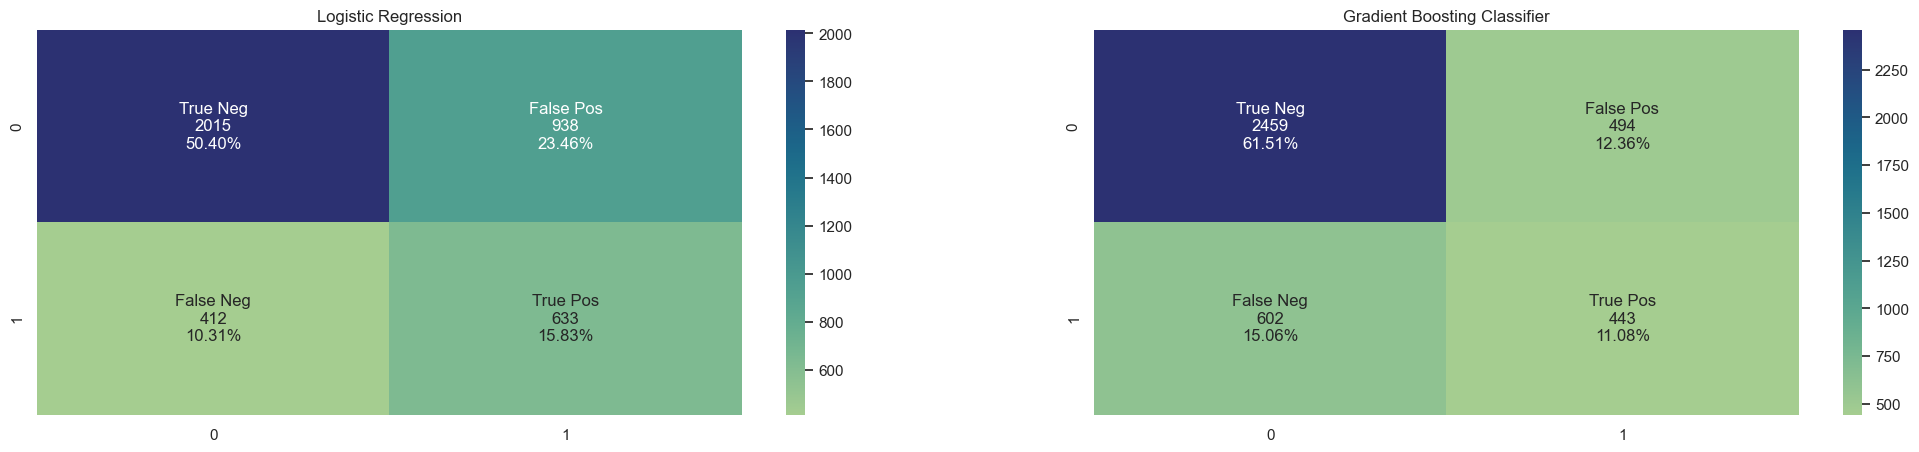

In [20]:
y_pred = []
y_pred.append(y_pred_lr)
y_pred.append(y_pred_gbc)

model_name = ['Logistic Regression', 'Gradient Boosting Classifier']

plt.figure(figsize=(25,5))
for i in range(len(y_pred)):
  plt.subplot(1, 2, i+1)
  cf_matrix = confusion_matrix(y_test, y_pred[i])
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='crest')
  plt.title(model_name[i])
plt.show()

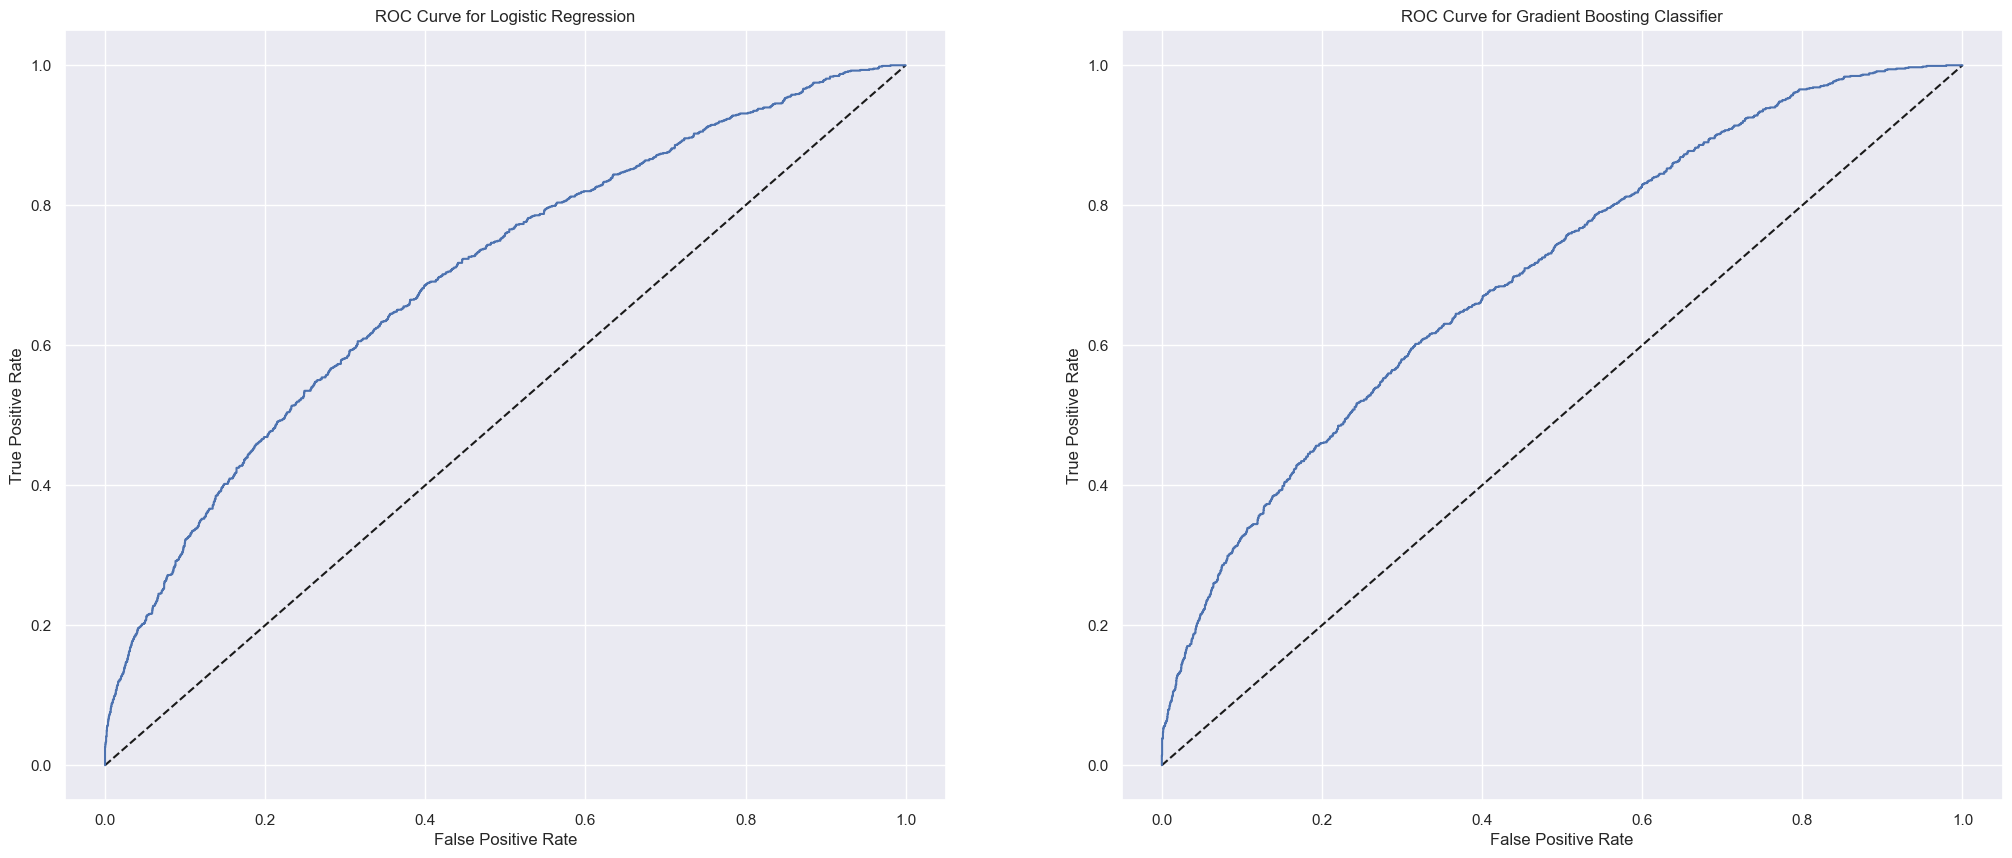

In [21]:
y_pred_prob_lr =lr_model.predict_proba(X_test)[:,1]
y_pred_prob_gbc =gbc_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ =roc_curve(y_test, y_pred_prob_lr)
fpr_gbc, tpr_gbc, _ =roc_curve(y_test, y_pred_prob_gbc)
fpr = []
fpr.append(fpr_lr)
fpr.append(fpr_gbc)
tpr = []
tpr.append(tpr_lr)
tpr.append(tpr_gbc)
plt.figure(figsize=(25,10))
for i in range(len(fpr)):
  plt.subplot(1, 2, i+1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr[i], tpr[i])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {model_name[i]}')
plt.show()

## Model Performance After Handling Imbalanced Classes (Tomek Links)

Text(0.5, 1.0, 'Distribution of Label')

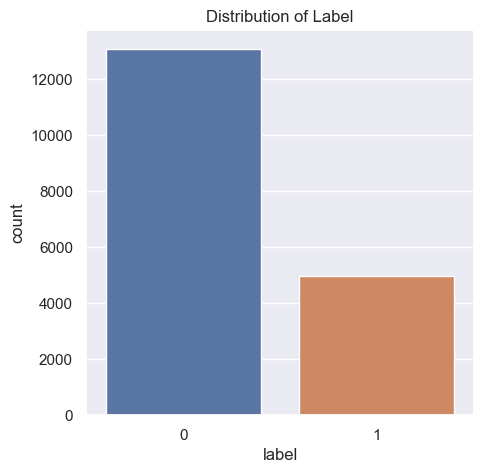

In [22]:
X = TDCAG.drop(['label','booking_id'], axis=1)
y = TDCAG.label

tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X, y)

df = X_tl
df['label'] = y_tl

plt.figure(figsize=(5,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='label', data=df)
plt.title('Distribution of Label')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

lr_model = Pipeline(steps=[("Sampling Strategy",  TomekLinks()),("Logistic Regression", LogisticRegression(max_iter=50000))])
with parallel_backend('dask'):
    lr_model.fit(X_train,y_train)
    y_pred_lr = lr_model.predict(X_test)

gbc_model = Pipeline(steps=[("Sampling Strategy",  TomekLinks()),("Gradient Boosting Classifier", GradientBoostingClassifier(n_estimators = 50))])
with parallel_backend('dask'):
    gbc_model.fit(X_train, y_train)
    y_pred_gbc = gbc_model.predict(X_test)
    

cv_results_lr = cross_validate(lr_model, X_train, y_train, cv=5, scoring=scoring)
cv_results_gbc = cross_validate(gbc_model, X_train, y_train, cv=5, scoring=scoring)

summary = pd.DataFrame([[cv_results_lr['fit_time'].mean(), cv_results_lr['test_F1'].mean(), cv_results_lr['test_precision'].mean(), cv_results_lr['test_roc_auc'].mean()],
                        [cv_results_gbc['fit_time'].mean(), cv_results_gbc['test_F1'].mean(), cv_results_gbc['test_precision'].mean(), cv_results_gbc['test_roc_auc'].mean()]],
                        columns=['Mean Fit Time', 'Mean F1 Score', 'Mean Precision', 'Mean ROC AUC'], index=['Logistic Regression', 'Gradient Boosting Classifier'])
display(summary.round(2))

,Mean Fit Time,Mean F1 Score,Mean Precision,Mean ROC AUC
Logistic Regression,77.36,0.32,0.58,0.69
Gradient Boosting Classifier,24.71,0.35,0.67,0.73


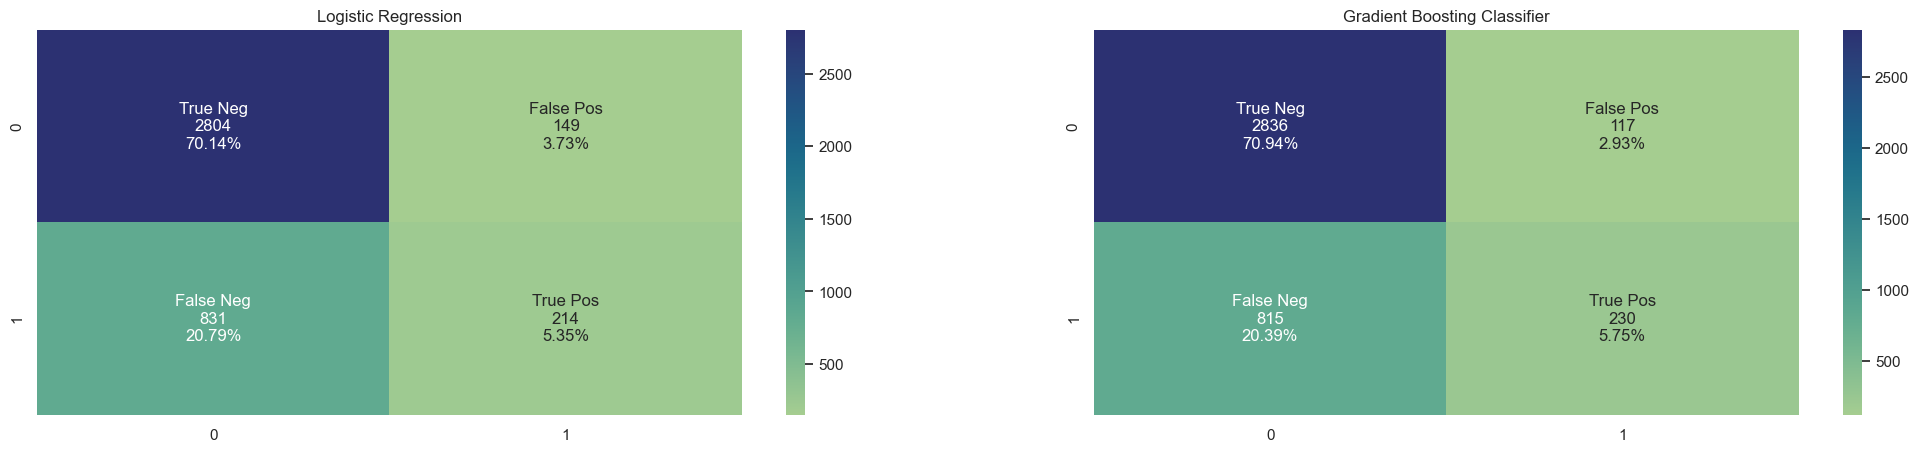

In [24]:
y_pred = []
y_pred.append(y_pred_lr)
y_pred.append(y_pred_gbc)

model_name = ['Logistic Regression', 'Gradient Boosting Classifier']

plt.figure(figsize=(25,5))
for i in range(len(y_pred)):
  plt.subplot(1, 2, i+1)
  cf_matrix = confusion_matrix(y_test, y_pred[i])
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='crest')
  plt.title(model_name[i])
plt.show()

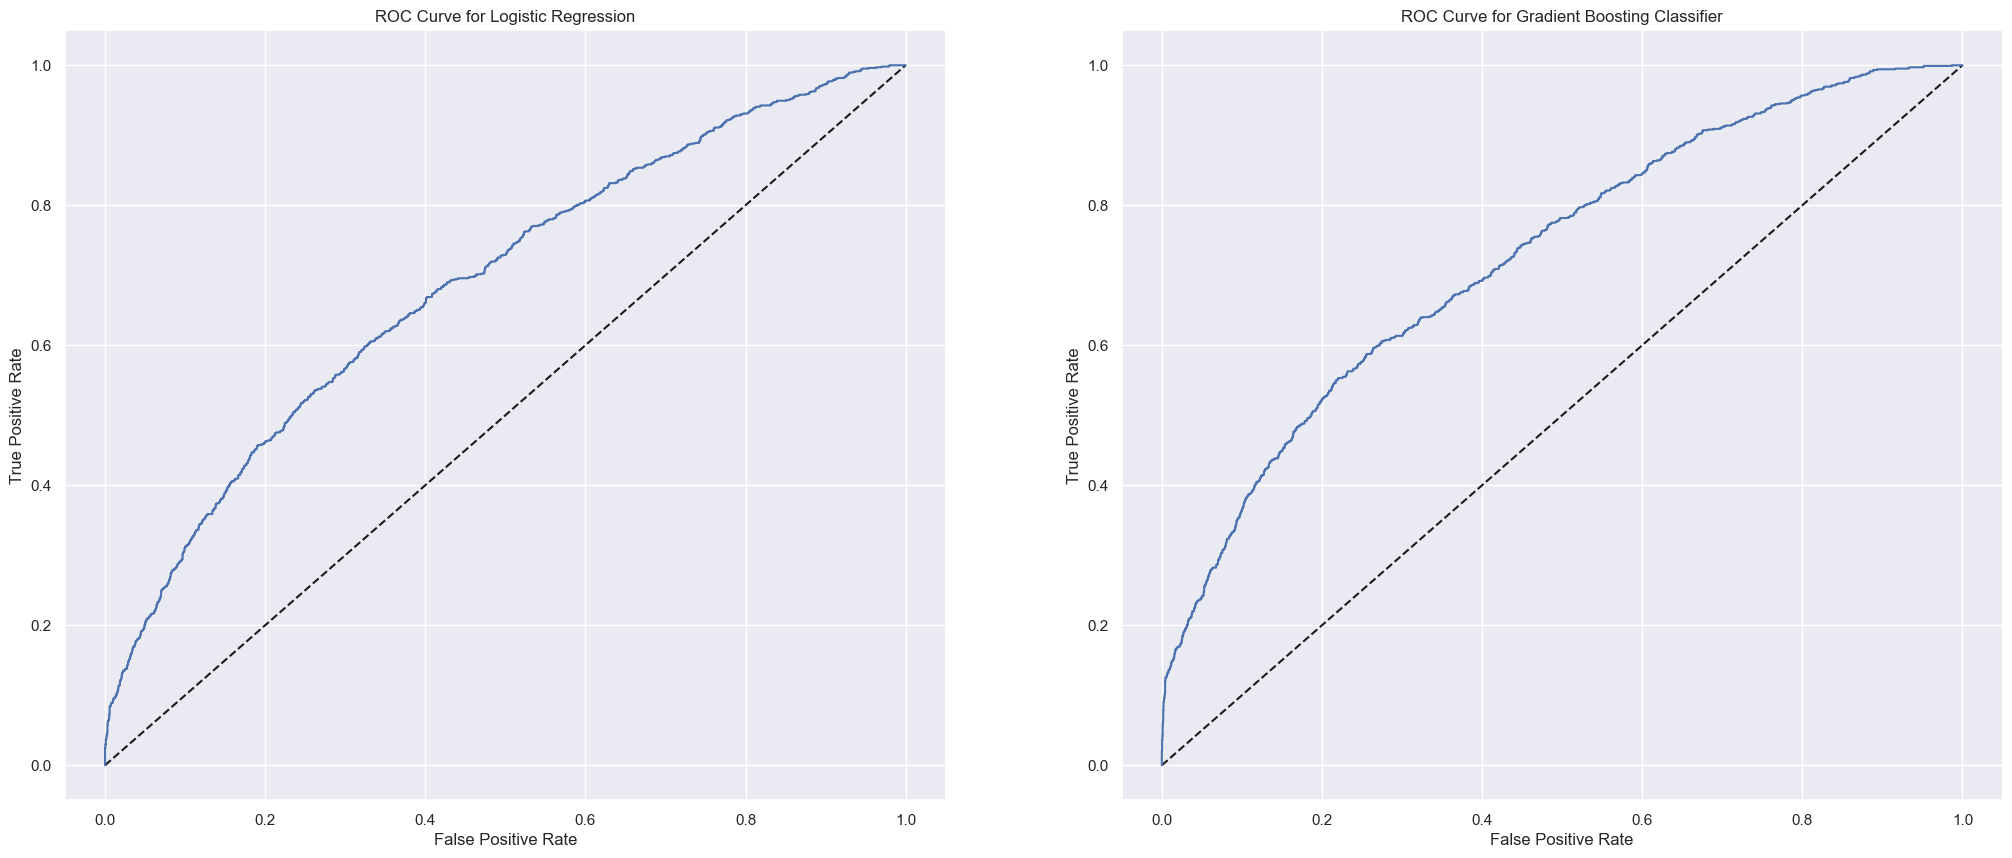

In [25]:
y_pred_prob_lr =lr_model.predict_proba(X_test)[:,1]
y_pred_prob_gbc =gbc_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ =roc_curve(y_test, y_pred_prob_lr)
fpr_gbc, tpr_gbc, _ =roc_curve(y_test, y_pred_prob_gbc)
fpr = []
fpr.append(fpr_lr)
fpr.append(fpr_gbc)
tpr = []
tpr.append(tpr_lr)
tpr.append(tpr_gbc)
plt.figure(figsize=(25,10))
for i in range(len(fpr)):
  plt.subplot(1, 2, i+1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr[i], tpr[i])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {model_name[i]}')
plt.show()

## Model Performance After Handling Imbalanced Classes (Adaptive Synthetic) 

Text(0.5, 1.0, 'Distribution of Label')

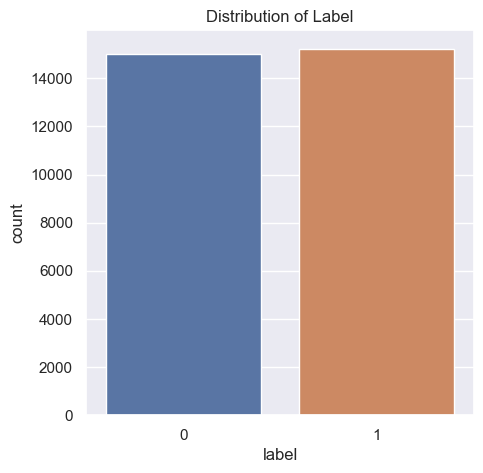

In [26]:
X = TDCAG.drop(['label','booking_id'], axis=1)
y = TDCAG.label

adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

df = X_adasyn
df['label'] = y_adasyn

plt.figure(figsize=(5,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='label', data=df)
plt.title('Distribution of Label')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

lr_model = Pipeline(steps=[("Sampling Strategy",  ADASYN()),("Logistic Regression", LogisticRegression(max_iter=50000))])
with parallel_backend('dask'):
    lr_model.fit(X_train,y_train)
    y_pred_lr = lr_model.predict(X_test)

gbc_model = Pipeline(steps=[("Sampling Strategy",  ADASYN()),("Gradient Boosting Classifier", GradientBoostingClassifier(n_estimators = 50))])
with parallel_backend('dask'):
    gbc_model.fit(X_train, y_train)
    y_pred_gbc = gbc_model.predict(X_test)
    

cv_results_lr = cross_validate(lr_model, X_train, y_train, cv=5, scoring=scoring)
cv_results_gbc = cross_validate(gbc_model, X_train, y_train, cv=5, scoring=scoring)

summary = pd.DataFrame([[cv_results_lr['fit_time'].mean(), cv_results_lr['test_F1'].mean(), cv_results_lr['test_precision'].mean(), cv_results_lr['test_roc_auc'].mean()],
                        [cv_results_gbc['fit_time'].mean(), cv_results_gbc['test_F1'].mean(), cv_results_gbc['test_precision'].mean(), cv_results_gbc['test_roc_auc'].mean()]],
                        columns=['Mean Fit Time', 'Mean F1 Score', 'Mean Precision', 'Mean ROC AUC'], index=['Logistic Regression', 'Gradient Boosting Classifier'])
display(summary.round(2))

,Mean Fit Time,Mean F1 Score,Mean Precision,Mean ROC AUC
Logistic Regression,3.15,0.46,0.38,0.69
Gradient Boosting Classifier,30.51,0.42,0.45,0.70


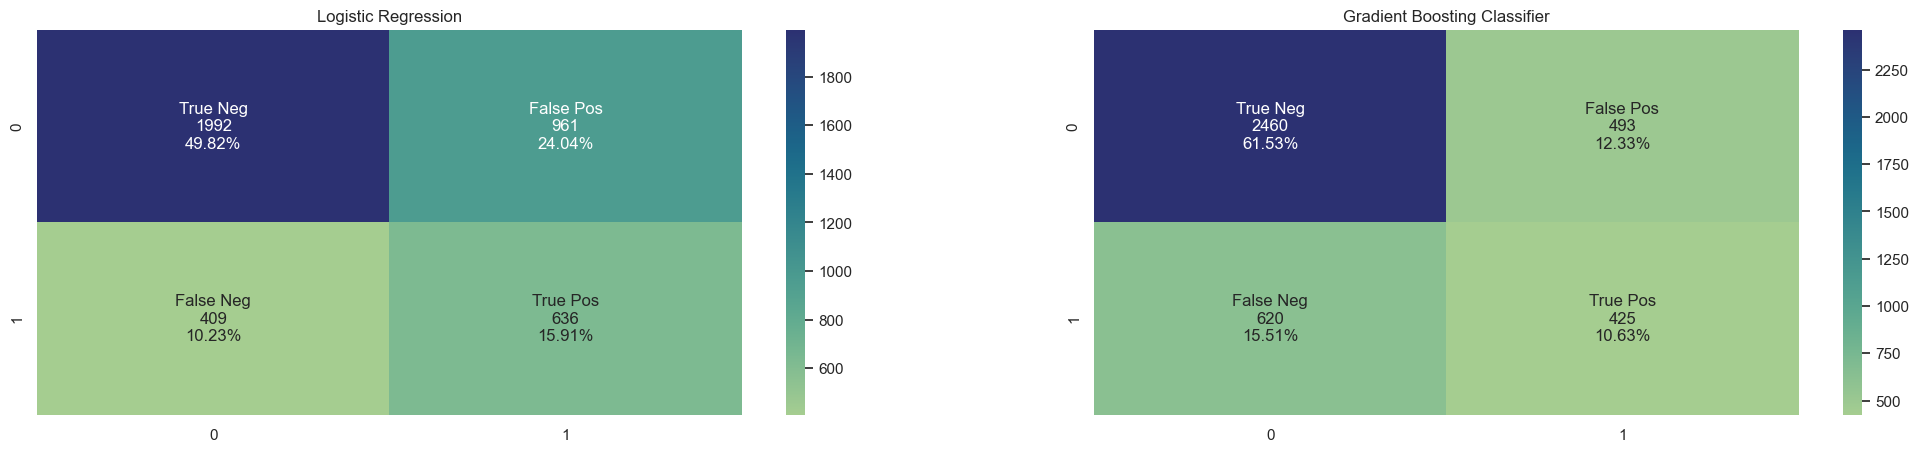

In [28]:
y_pred = []
y_pred.append(y_pred_lr)
y_pred.append(y_pred_gbc)

model_name = ['Logistic Regression', 'Gradient Boosting Classifier']

plt.figure(figsize=(25,5))
for i in range(len(y_pred)):
  plt.subplot(1, 2, i+1)
  cf_matrix = confusion_matrix(y_test, y_pred[i])
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='crest')
  plt.title(model_name[i])
plt.show()

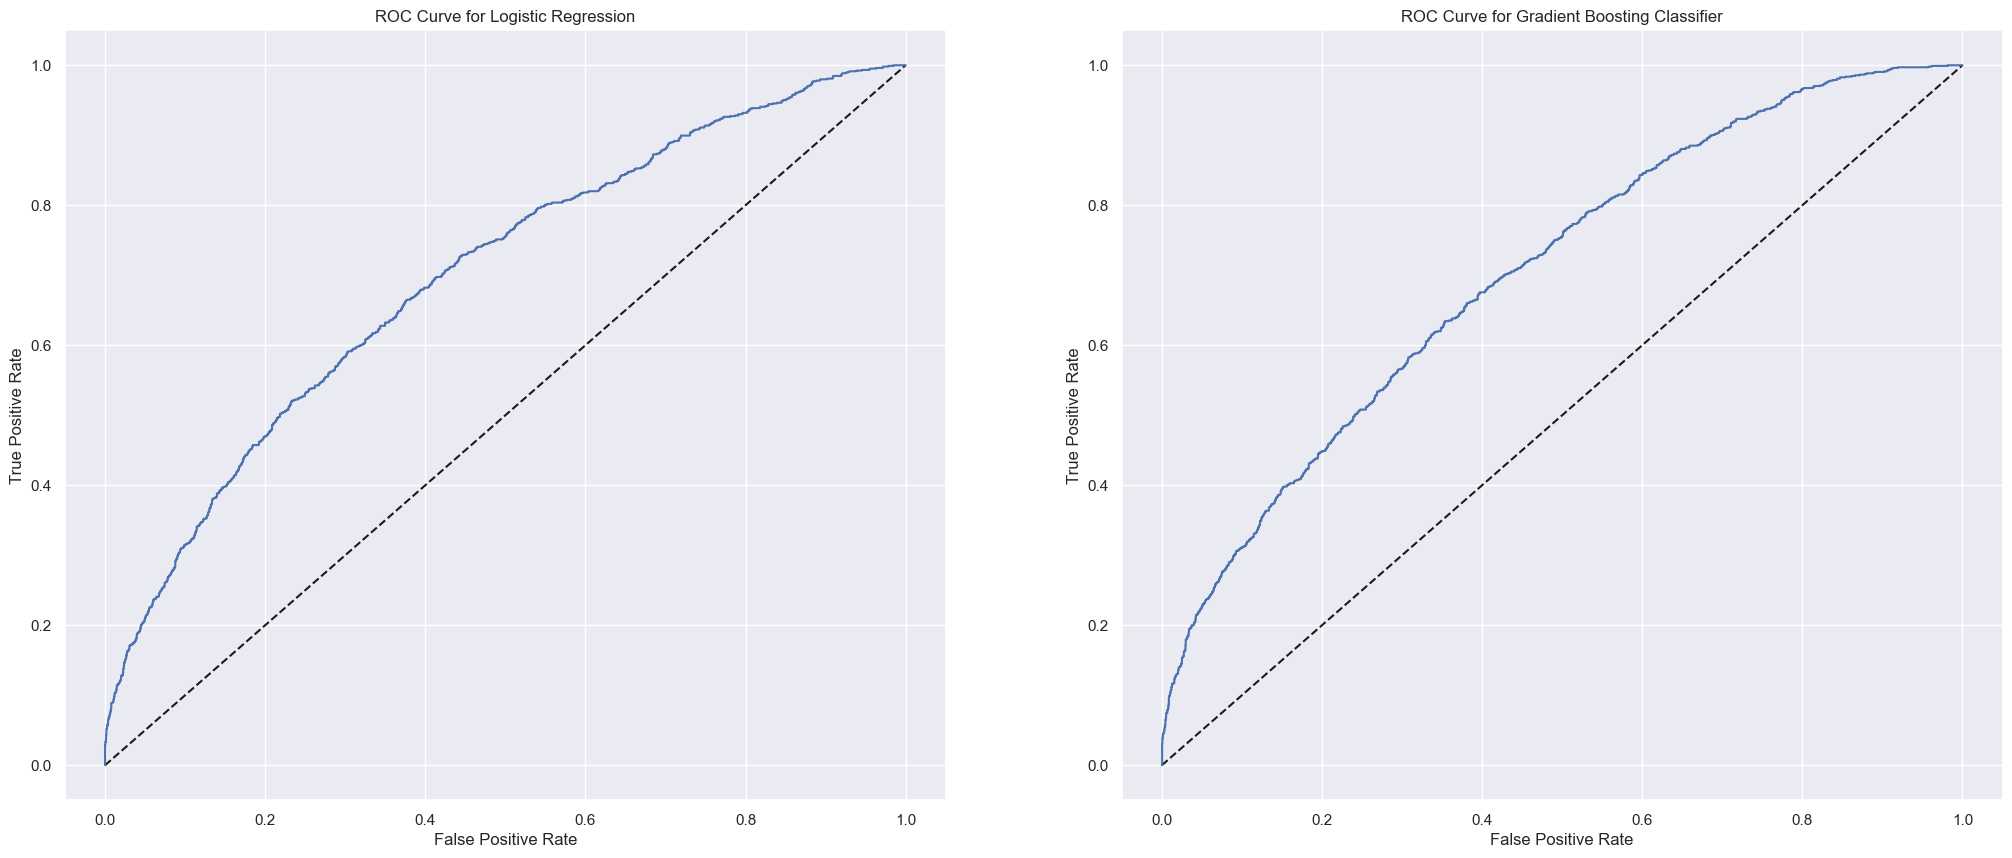

In [29]:
y_pred_prob_lr =lr_model.predict_proba(X_test)[:,1]
y_pred_prob_gbc =gbc_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ =roc_curve(y_test, y_pred_prob_lr)
fpr_gbc, tpr_gbc, _ =roc_curve(y_test, y_pred_prob_gbc)
fpr = []
fpr.append(fpr_lr)
fpr.append(fpr_gbc)
tpr = []
tpr.append(tpr_lr)
tpr.append(tpr_gbc)
plt.figure(figsize=(25,10))
for i in range(len(fpr)):
  plt.subplot(1, 2, i+1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr[i], tpr[i])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {model_name[i]}')
plt.show()

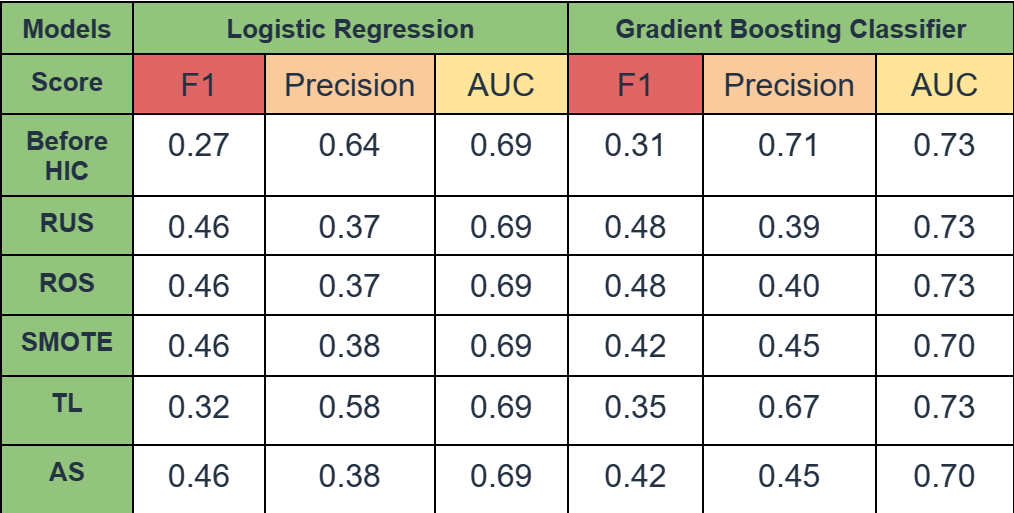